In [3]:
%matplotlib inline

import pandas as pd
import networkx as nx

import warnings
from operator import itemgetter
from networkx.algorithms import community

In [4]:
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style("whitegrid")

from operator import is_not
from functools import partial

In [5]:
df = pd.read_csv("node2vec-motivasidantarget.csv")
df

,partai,kalimat,kata0,kata1,kata2,kata3,kata4,kategori
0,Demokrat,juang aspirasi rakyat aceh indonesia,juang,bidang,bangun,masyarakat,masyarakat,Pembangunan Daerah
1,Nasdem,juang hak hak kaum perempuan,juang,bangun,masyarakat,masyarakat,masyarakat,Pembangunan Daerah
2,Gerindra,juang hak hak perempuan bangun aceh,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
3,Golkar,juang aspirasi rakyat aceh indonesia,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
4,PKS,1 juang program aksi gerindra tingkat sehat ma...,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
...,...,...,...,...,...,...,...,...
81,PAN,juang masyarakat dapil hidup ...,masyarakat,juang,didik,kota,kota,Isu Pendidikan
82,Demokrat,motivasi calon anggota legislatif provinsi...,masyarakat,anak,juang,kota,kota,Isu Pendidikan
83,PDIP,salur aspirasi masyarakat nusa tenggara t...,masyarakat,juang,kota,kota,kota,Isu Pendidikan
84,Hanura,abdi masyarakat,masyarakat,anak,juang,didik,kota,Isu Pendidikan


In [6]:
g = nx.from_pandas_edgelist(df, source='kategori', target='kata0')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata1')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata2')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata3')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata4')

In [7]:
dfpartaikata0 = df[['partai','kata0']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata0clean = dfpartaikata0.dropna()
dfpartaikata0clean
listpartaikata0 = dfpartaikata0clean.values.tolist()
listpartaikata0

[['Demokrat', 'juang'],
 ['Nasdem', 'juang'],
 ['Gerindra', 'juang'],
 ['Golkar', 'juang'],
 ['PKS', 'juang'],
 ['PPP', 'juang'],
 ['PKB', 'juang'],
 ['PSI', 'juang'],
 ['PAN', 'juang'],
 ['PKPI', 'juang'],
 ['Garuda', 'juang'],
 ['Hanura', 'juang'],
 ['Berkarya', 'juang'],
 ['PDIP', 'juang'],
 ['PBB', 'juang'],
 ['Gerindra', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PPP', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['Garuda', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Hanura', 'masyarakat'],
 ['Demokrat', 'masyarakat'],
 ['PPP', 'provinsi'],
 ['PSI', 'provinsi'],
 ['PKB', 'provinsi'],
 ['Nasdem', 'provinsi'],
 ['Gerindra', 'provinsi'],
 ['PAN', 'provinsi'],
 ['Golkar', 'provinsi'],
 ['Berkarya', 'provinsi'],
 ['PDIP', 'provinsi'],
 ['Garuda', 'provinsi'],
 ['PKS', 'provinsi'],
 ['Hanura', 'provinsi'],
 ['Demokra

In [8]:
dfpartaikata1 = df[['partai','kata1']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata1clean = dfpartaikata1.dropna()
dfpartaikata1clean
listpartaikata1 = dfpartaikata1clean.values.tolist()
listpartaikata1

[['Demokrat', 'bidang'],
 ['Nasdem', 'bangun'],
 ['Gerindra', 'bidang'],
 ['Golkar', 'bidang'],
 ['PKS', 'bidang'],
 ['PPP', 'bidang'],
 ['PKB', 'bidang'],
 ['PSI', 'bidang'],
 ['PAN', 'bidang'],
 ['PKPI', 'bidang'],
 ['Garuda', 'bidang'],
 ['Hanura', 'bidang'],
 ['Berkarya', 'bidang'],
 ['PDIP', 'bidang'],
 ['PBB', 'bidang'],
 ['Gerindra', 'tingkat'],
 ['Berkarya', 'hak'],
 ['PKS', 'hak'],
 ['PKB', 'tingkat'],
 ['Golkar', 'tingkat'],
 ['PSI', 'hak'],
 ['PPP', 'tingkat'],
 ['PKPI', 'hak'],
 ['PDIP', 'hak'],
 ['Nasdem', 'hak'],
 ['PAN', 'hak'],
 ['Garuda', 'hak'],
 ['PBB', 'hak'],
 ['Hanura', 'hak'],
 ['Demokrat', 'tingkat'],
 ['PPP', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['Garuda', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['Hanura', 'masyarakat'],
 ['Demokrat', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 [

In [9]:
dfpartaikata2 = df[['partai','kata2']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata2clean = dfpartaikata2.dropna()
dfpartaikata2clean
listpartaikata2 = dfpartaikata2clean.values.tolist()
listpartaikata2

[['Demokrat', 'bangun'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'bangun'],
 ['Golkar', 'bangun'],
 ['PKS', 'bangun'],
 ['PPP', 'bangun'],
 ['PKB', 'bangun'],
 ['PSI', 'bangun'],
 ['PAN', 'bangun'],
 ['PKPI', 'bangun'],
 ['Garuda', 'masyarakat'],
 ['Hanura', 'bangun'],
 ['Berkarya', 'bangun'],
 ['PDIP', 'bangun'],
 ['PBB', 'bangun'],
 ['Gerindra', 'pihak'],
 ['Berkarya', 'tingkat'],
 ['PKS', 'tingkat'],
 ['PKB', 'pihak'],
 ['Golkar', 'pihak'],
 ['PSI', 'tingkat'],
 ['PPP', 'pihak'],
 ['PKPI', 'tingkat'],
 ['PDIP', 'tingkat'],
 ['Nasdem', 'tingkat'],
 ['PAN', 'tingkat'],
 ['Garuda', 'tingkat'],
 ['PBB', 'tingkat'],
 ['Hanura', 'tingkat'],
 ['Demokrat', 'pihak'],
 ['PPP', 'bangun'],
 ['PSI', 'bangun'],
 ['PKB', 'bangun'],
 ['Nasdem', 'bangun'],
 ['Gerindra', 'bangun'],
 ['PAN', 'bangun'],
 ['Golkar', 'bangun'],
 ['Berkarya', 'bangun'],
 ['PDIP', 'bangun'],
 ['Garuda', 'bangun'],
 ['PKS', 'dprd'],
 ['Hanura', 'bangun'],
 ['Demokrat', 'bangun'],
 ['PKPI', 'bangun'],
 ['PBB', 'bangun'],
 [

In [10]:
dfpartaikata3 = df[['partai','kata3']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata3clean = dfpartaikata3.dropna()
dfpartaikata3clean
listpartaikata3 = dfpartaikata3clean.values.tolist()
listpartaikata3

[['Demokrat', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['PPP', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 ['Garuda', 'utara'],
 ['Hanura', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Gerindra', 'perintah'],
 ['Berkarya', 'perintah'],
 ['PKS', 'pihak'],
 ['PKB', 'perintah'],
 ['Golkar', 'perintah'],
 ['PSI', 'pihak'],
 ['PPP', 'perintah'],
 ['PKPI', 'perintah'],
 ['PDIP', 'pihak'],
 ['Nasdem', 'pihak'],
 ['PAN', 'pihak'],
 ['Garuda', 'pihak'],
 ['PBB', 'tingkat'],
 ['Hanura', 'pihak'],
 ['Demokrat', 'perintah'],
 ['PPP', 'dprd'],
 ['PSI', 'dprd'],
 ['PKB', 'dprd'],
 ['Nasdem', 'dprd'],
 ['Gerindra', 'dprd'],
 ['PAN', 'dprd'],
 ['Golkar', 'dprd'],
 ['Berkarya', 'dprd'],
 ['PDIP', 'dprd'],
 ['Garuda', 'dprd'],
 ['PKS', 'fungsi'],
 ['Hanura', 'dprd'],
 ['Demokrat', 'dprd'],
 ['PKPI', 'dprd

In [11]:
dfpartaikata4 = df[['partai','kata4']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata4clean = dfpartaikata4.dropna()
dfpartaikata4clean
listpartaikata4 = dfpartaikata4clean.values.tolist()
listpartaikata4

[['Demokrat', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'utara'],
 ['Golkar', 'utara'],
 ['PKS', 'utara'],
 ['PPP', 'utara'],
 ['PKB', 'utara'],
 ['PSI', 'utara'],
 ['PAN', 'utara'],
 ['PKPI', 'utara'],
 ['Garuda', 'utara'],
 ['Hanura', 'utara'],
 ['Berkarya', 'utara'],
 ['PDIP', 'utara'],
 ['PBB', 'masyarakat'],
 ['Gerindra', 'perintah'],
 ['Berkarya', 'perintah'],
 ['PKS', 'perintah'],
 ['PKB', 'perintah'],
 ['Golkar', 'perintah'],
 ['PSI', 'perintah'],
 ['PPP', 'perintah'],
 ['PKPI', 'perintah'],
 ['PDIP', 'perintah'],
 ['Nasdem', 'perintah'],
 ['PAN', 'perintah'],
 ['Garuda', 'perintah'],
 ['PBB', 'tingkat'],
 ['Hanura', 'perintah'],
 ['Demokrat', 'perintah'],
 ['PPP', 'fungsi'],
 ['PSI', 'fungsi'],
 ['PKB', 'fungsi'],
 ['Nasdem', 'fungsi'],
 ['Gerindra', 'fungsi'],
 ['PAN', 'fungsi'],
 ['Golkar', 'fungsi'],
 ['Berkarya', 'fungsi'],
 ['PDIP', 'fungsi'],
 ['Garuda', 'fungsi'],
 ['PKS', 'fungsi'],
 ['Hanura', 'fungsi'],
 ['Demokrat', 'fungsi'],
 ['PKPI', 'fungsi'],
 ['P

In [12]:
g.add_edges_from(listpartaikata0,weight=1, label="partaikata0edge")
g.add_edges_from(listpartaikata1,weight=1, label="partaikata1edge")
g.add_edges_from(listpartaikata2,weight=1, label="partaikata2edge")
g.add_edges_from(listpartaikata3,weight=1, label="partaikata3edge")
g.add_edges_from(listpartaikata4,weight=1, label="partaikata3edge")

In [13]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels
labelsclean = {k: v for k, v in labels.items() if pd.Series(v).notna().all()}
labelsclean

{'Pembangunan Daerah': 'Pembangunan Daerah',
 'masyarakat': 'masyarakat',
 'utara': 'utara',
 'Pergerakan Nasional': 'Pergerakan Nasional',
 'perintah': 'perintah',
 'tingkat': 'tingkat',
 'Peran Anggota Legislatif': 'Peran Anggota Legislatif',
 'fungsi': 'fungsi',
 'Perekonomian Masyarakat': 'Perekonomian Masyarakat',
 'ekonomi': 'ekonomi',
 'kaum': 'kaum',
 'maju': 'maju',
 'Kesejahteraan Rakyat': 'Kesejahteraan Rakyat',
 'perempuan': 'perempuan',
 'penting': 'penting',
 'Isu Pendidikan': 'Isu Pendidikan',
 'kota': 'kota',
 'didik': 'didik',
 'juang': 'juang',
 'Demokrat': 'Demokrat',
 'Nasdem': 'Nasdem',
 'Gerindra': 'Gerindra',
 'Golkar': 'Golkar',
 'PKS': 'PKS',
 'PPP': 'PPP',
 'PKB': 'PKB',
 'PSI': 'PSI',
 'PAN': 'PAN',
 'PKPI': 'PKPI',
 'Garuda': 'Garuda',
 'Hanura': 'Hanura',
 'Berkarya': 'Berkarya',
 'PDIP': 'PDIP',
 'PBB': 'PBB',
 'provinsi': 'provinsi',
 'daerah': 'daerah',
 'rakyat': 'rakyat',
 'bidang': 'bidang',
 'bangun': 'bangun',
 'hak': 'hak',
 'anak': 'anak',
 'pihak

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


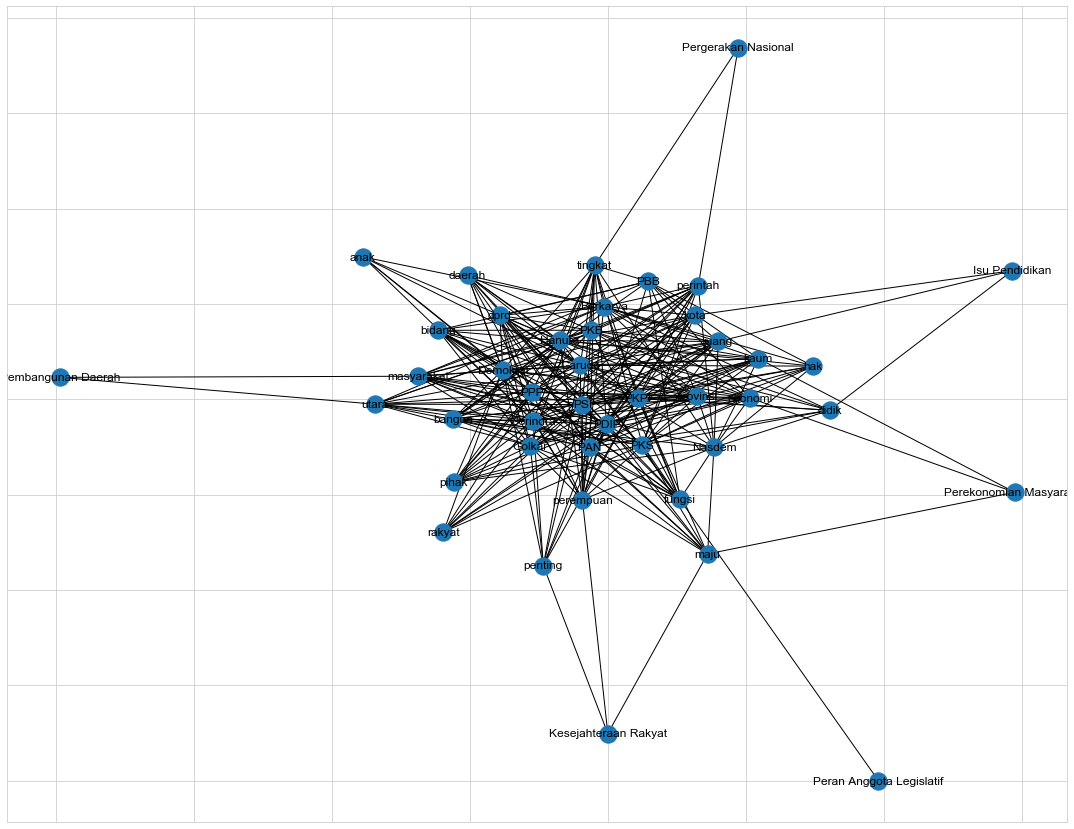

In [37]:
fig, ax = plt.subplots(figsize=(19,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels = True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
partaipopuler = [namapartai for namapartai in df.partai if g.degree(namapartai) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=partaipopuler, node_color='orange', node_size=150)

In [15]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(g, dimensions=50, walk_length=16, num_walks=100, workers=4)

Computing transition probabilities: 100%|█████████████████████████████████████████████| 43/43 [00:00<00:00, 205.30it/s]


In [16]:
# EmbedQ
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [17]:
df.partai

0     Demokrat
1       Nasdem
2     Gerindra
3       Golkar
4          PKS
        ...   
81         PAN
82    Demokrat
83        PDIP
84      Hanura
85        PKPI
Name: partai, Length: 86, dtype: object

In [18]:
used = set()
nodepartai = [x for x in df.partai if x not in used and (used.add(x) or True)]
#nodepartai = set(nodepartai)
nodepartai

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB']

In [19]:
nodepartai2 = [x for x in df.partai]
nodepartai2

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB',
 'Gerindra',
 'Berkarya',
 'PKS',
 'PKB',
 'Golkar',
 'PSI',
 'PPP',
 'PKPI',
 'PDIP',
 'Nasdem',
 'PAN',
 'Garuda',
 'PBB',
 'Hanura',
 'Demokrat',
 'PPP',
 'PSI',
 'PKB',
 'Nasdem',
 'Gerindra',
 'PAN',
 'Golkar',
 'Berkarya',
 'PDIP',
 'Garuda',
 'PKS',
 'Hanura',
 'Demokrat',
 'PKPI',
 'PBB',
 'Golkar',
 'PAN',
 'PSI',
 'Hanura',
 'PDIP',
 'Berkarya',
 'PKB',
 'Demokrat',
 'PPP',
 'Garuda',
 'PKPI',
 'Gerindra',
 'PBB',
 'Nasdem',
 'PKS',
 'Golkar',
 'Gerindra',
 'PAN',
 'PSI',
 'PKS',
 'PPP',
 'PDIP',
 'PKPI',
 'Demokrat',
 'Nasdem',
 'Garuda',
 'Gerindra',
 'Garuda',
 'PKB',
 'PSI',
 'Golkar',
 'PPP',
 'Berkarya',
 'PBB',
 'Nasdem',
 'PKS',
 'PAN',
 'Demokrat',
 'PDIP',
 'Hanura',
 'PKPI']

In [20]:
nodekategori = [x for x in df.kategori]
#nodepartai = set(nodepartai)
nodekategori

['Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Per

In [21]:
used = set()
#uniq = ['PARTAI_KEADILAN_SEJAHTERA']
uniq2 = [x for x in nodepartai if x not in used and (used.add(x) or True)]
uniq2

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB']

In [22]:
embeddings = np.array([model.wv[x] for x in nodepartai2])
embeddings

array([[ 0.1728915 ,  0.06662266,  0.1424364 , ..., -0.07971329,
         0.15286769,  0.17063741],
       [ 0.1545643 ,  0.08667264,  0.14285797, ..., -0.08708113,
         0.16815972,  0.18073681],
       [ 0.18080598,  0.07775672,  0.13357422, ..., -0.07492556,
         0.14687416,  0.16223487],
       ...,
       [ 0.16461791,  0.06999783,  0.13516295, ..., -0.07488234,
         0.17465487,  0.17866978],
       [ 0.1749334 ,  0.08445378,  0.11963771, ..., -0.10655168,
         0.15847927,  0.15816362],
       [ 0.16804884,  0.08045372,  0.14730987, ..., -0.10755315,
         0.16453564,  0.16152757]], dtype=float32)

In [23]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [35]:
warna_kategori = {
    'Perekonomian Masyarakat':'lightsalmon',
    'Kesejahteraan Rakyat':'palegreen',
    'Isu Pendidikan':'lightblue',
    'Pembangunan Daerah':'yellow',
    'Pergerakan Nasional':'mediumpurple',
    'Peran Anggota Legislatif':'lightpink'}
    #'Partai_Keadilan_Sejahtera':'yellow',
    #'Partai_Kebangkitan_Bangsa':'darkcyan',
    #'Partai_Persatuan_Pembangunan':'steelblue'}

df['color'] = df['kategori'].apply(lambda x: warna_kategori[x])
warna_partai=dict(zip(df['partai'],df['color']))
colors = [warna_kategori[x] for x in df.kategori]

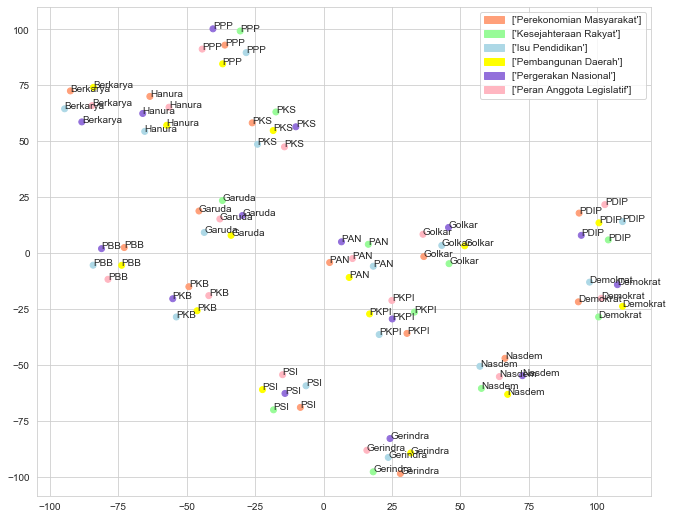

In [36]:
figure = plt.figure(figsize=(11,9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=colors)

i = 0
for partaiku in nodepartai2:
    ax.annotate(partaiku, (embeddings_2d[i,0], embeddings_2d[i, 1]))
    i=i+1
    

partai_legend=[mpatches.Patch(color=color, label=df.partai.unique()) for df.partai, color in warna_kategori.items()]
ax.legend(handles=partai_legend);

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
plt.axis('off')